In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('US_Accidents_March23.csv')
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15304\3229518853.py:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US_Accidents_March23.csv')


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
US_Accidents=df.copy()

In [5]:
US_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829724 entries, 0 to 3829723
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  Country                object 
 14  State                  object 
 15  Zipcode                object 
 16  Country.1              object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
US_Accidents.duplicated().sum()
US_Accidents = US_Accidents.drop_duplicates()

In [7]:
missing_values = US_Accidents.isnull().sum()
missing_values = missing_values.sort_values(ascending = False)
missing_values

End_Lng                  3402762
End_Lat                  3402762
Precipitation(in)        1795592
Wind_Chill(F)            1670390
Wind_Speed(mph)           408417
Visibility(mi)             76298
Weather_Condition          75242
Humidity(%)                71775
Temperature(F)             67265
Wind_Direction             62775
Pressure(in)               57270
Weather_Timestamp          46319
Airport_Code                7605
Sunrise_Sunset              3155
Astronomical_Twilight       3155
Nautical_Twilight           3155
Civil_Twilight              3155
Timezone                    3106
Street                      2415
Zipcode                      615
City                          92
Description                    5
Country                        1
Amenity                        1
Country.1                      1
State                          1
Bump                           1
Crossing                       1
Give_Way                       1
Junction                       1
Station   

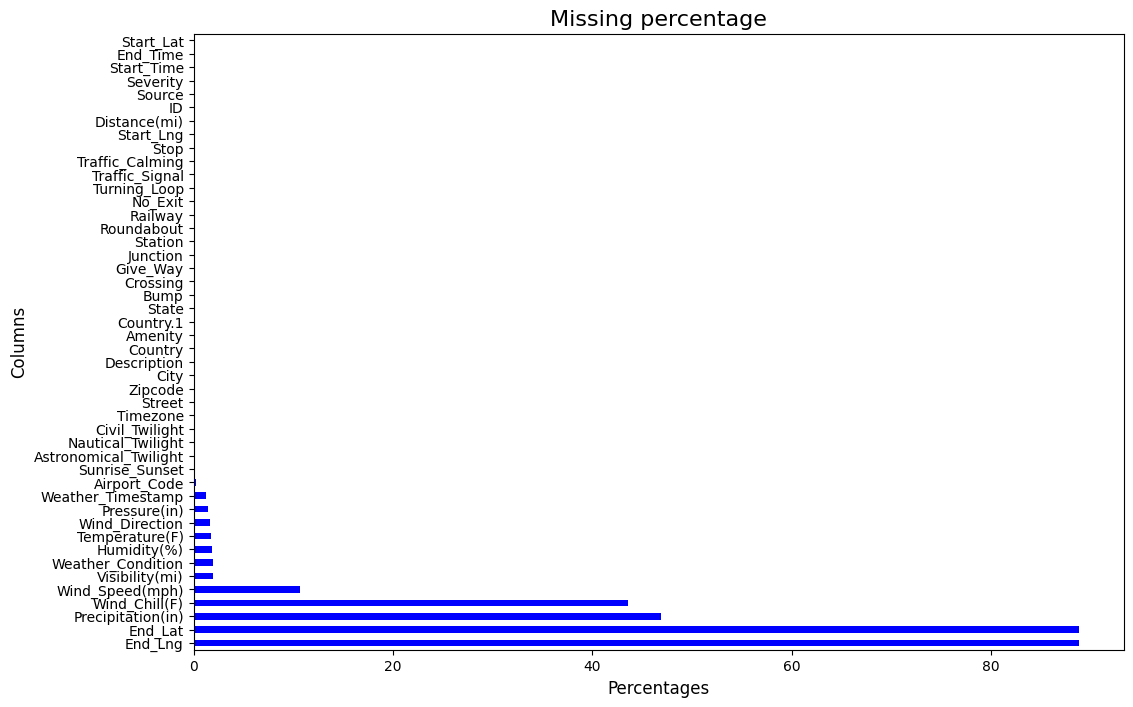

In [8]:
missing_percentage = US_Accidents.isnull().sum().sort_values(ascending=False)/len(US_Accidents)*100
plt.figure(figsize=(12, 8))

missing_percentage.plot(kind='barh', color='blue')

plt.title('Missing percentage', fontsize=16)
plt.xlabel('Percentages', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.show()

In [9]:
columns_to_drop = missing_percentage[missing_percentage > 25].index
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

In [10]:
num_cols=US_Accidents.select_dtypes(include=['float64','int64']).columns
cat_cols=US_Accidents.select_dtypes(include=['object']).columns

In [11]:
US_Accidents[num_cols].describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,3.829724e+06,3.829724e+06,3.829724e+06,3.829724e+06,3.762459e+06,3.757949e+06,3.772454e+06,3.753426e+06,3.421307e+06
mean,2.322807e+00,3.618600e+01,-9.364790e+01,2.812364e-01,6.227387e+01,6.599005e+01,2.968936e+01,9.102341e+00,7.923273e+00
std,5.138544e-01,4.836383e+00,1.653715e+01,1.676064e+00,1.861562e+01,2.251680e+01,8.391424e-01,2.740482e+00,5.253931e+00
min,1.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.338646e+01,-1.118071e+02,0.000000e+00,5.000000e+01,5.000000e+01,2.957000e+01,1.000000e+01,4.600000e+00
50%,2.000000e+00,3.550635e+01,-8.758888e+01,0.000000e+00,6.400000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00
75%,3.000000e+00,4.003823e+01,-8.082043e+01,0.000000e+00,7.600000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.417500e+02,2.030000e+02,1.000000e+02,5.832000e+01,1.400000e+02,8.228000e+02


In [12]:
import warnings
warnings.filterwarnings('ignore')

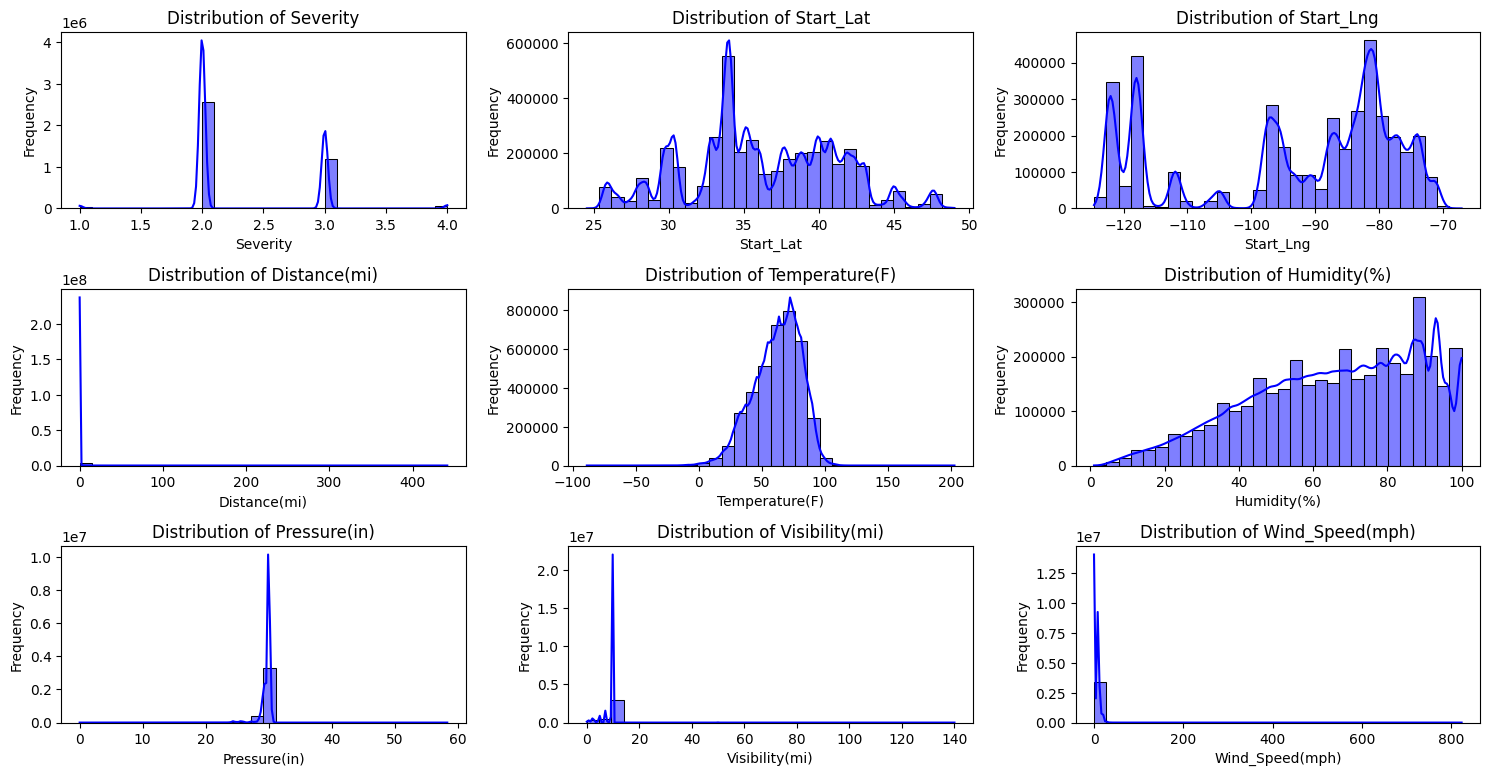

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)
    sns.histplot(US_Accidents[col], kde= True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
US_Accidents['Temperature(F)']=US_Accidents['Temperature(F)'].fillna(US_Accidents['Temperature(F)'].mean())

fill_with_median = [col for col in num_cols if col != 'Temperature(F)']
US_Accidents[fill_with_median]=US_Accidents[fill_with_median].fillna(US_Accidents[fill_with_median].median())

In [15]:
US_Accidents[cat_cols]=US_Accidents[cat_cols].fillna(US_Accidents[cat_cols].mode().iloc[0])

In [16]:
US_Accidents.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
Country                  0
State                    0
Zipcode                  0
Country.1                0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

In [19]:
columns_to_drop = ['ID', 'Description', 'Zipcode', 'Timezone', 'Airport_Code',
                   'Wind_Direction', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
US_Accidents = US_Accidents.drop(columns=columns_to_drop)


In [20]:
cat_cols=US_Accidents.select_dtypes(include=['object']).columns

for cat in cat_cols:
    print(cat, US_Accidents[cat].nunique())

Source 3
Start_Time 3649049
End_Time 3660635
Street 201692
City 12212
Country 1782
State 49
Country.1 1
Weather_Timestamp 727593
Weather_Condition 136
Sunrise_Sunset 2


In [21]:
US_Accidents = US_Accidents.drop(columns=['Country'])

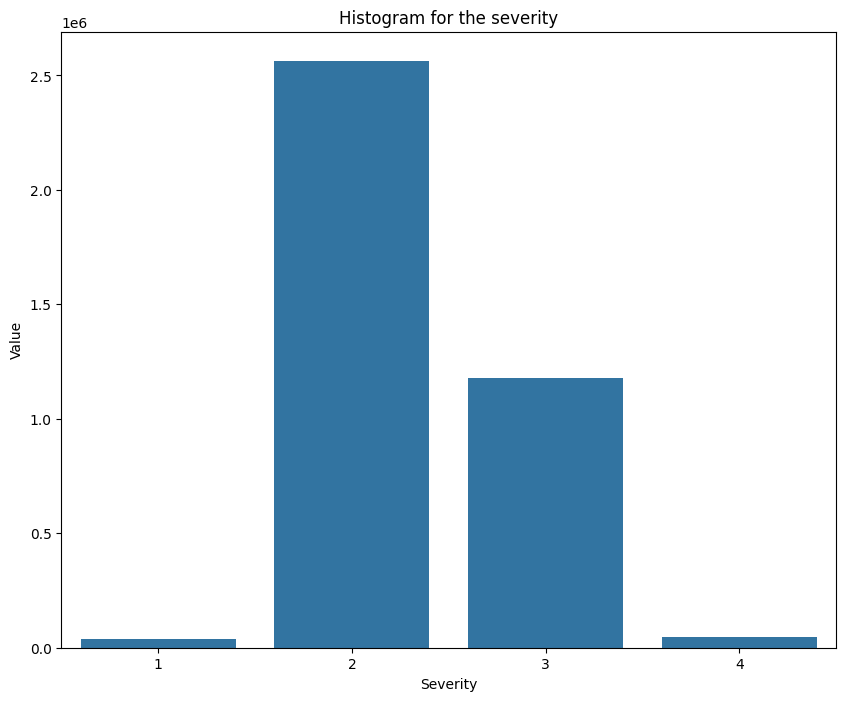

In [22]:
severity_counts = US_Accidents["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scalermax = MinMaxScaler()
scalerstd = StandardScaler()
fill_with_median = [col for col in fill_with_median if col != 'Severity']
US_Accidents[fill_with_median] = scalermax.fit_transform(US_Accidents[fill_with_median])
US_Accidents['Temperature(F)'] = scalerstd.fit_transform(US_Accidents[['Temperature(F)']])

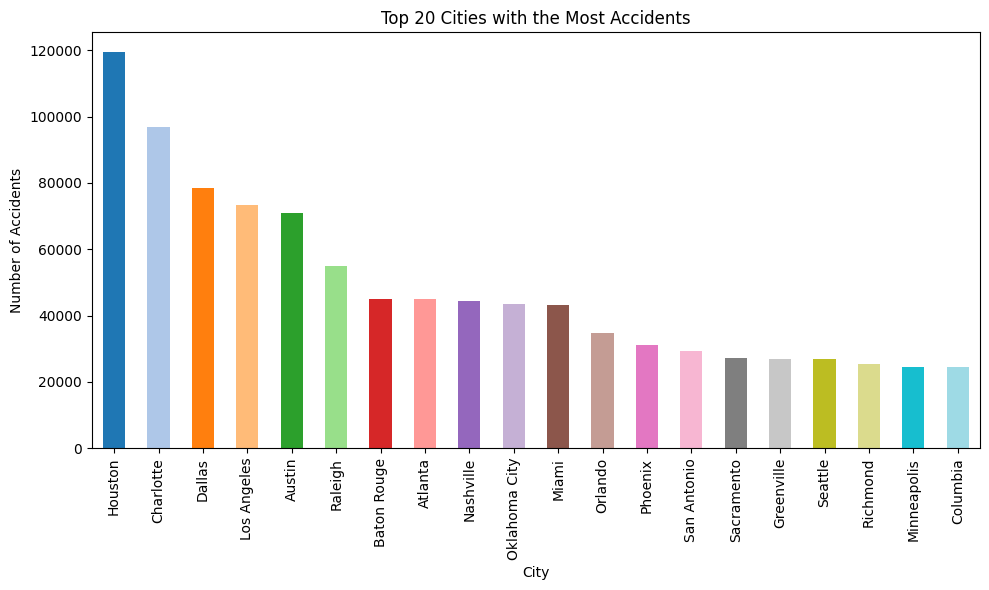

In [24]:
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)


plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

<Axes: xlabel='Start_Time', ylabel='Density'>

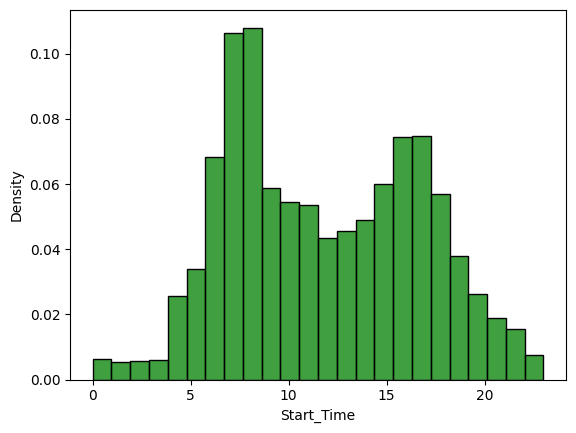

In [25]:
US_Accidents.Start_Time = pd.to_datetime(US_Accidents['Start_Time'] , format='mixed', errors='coerce' )
sns.histplot( US_Accidents.Start_Time.dt.hour , bins = 24 , kde = False, stat = 'density' ,color = 'green')

<Axes: xlabel='Start_Time', ylabel='Density'>

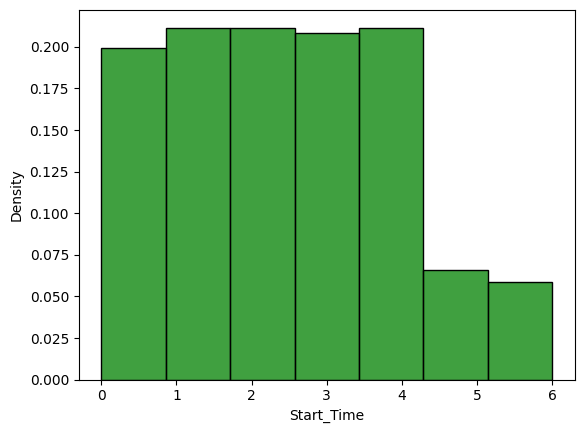

In [26]:
sns.histplot( US_Accidents.Start_Time.dt.dayofweek , bins = 7 , kde = False , stat = 'density' , color = 'green')

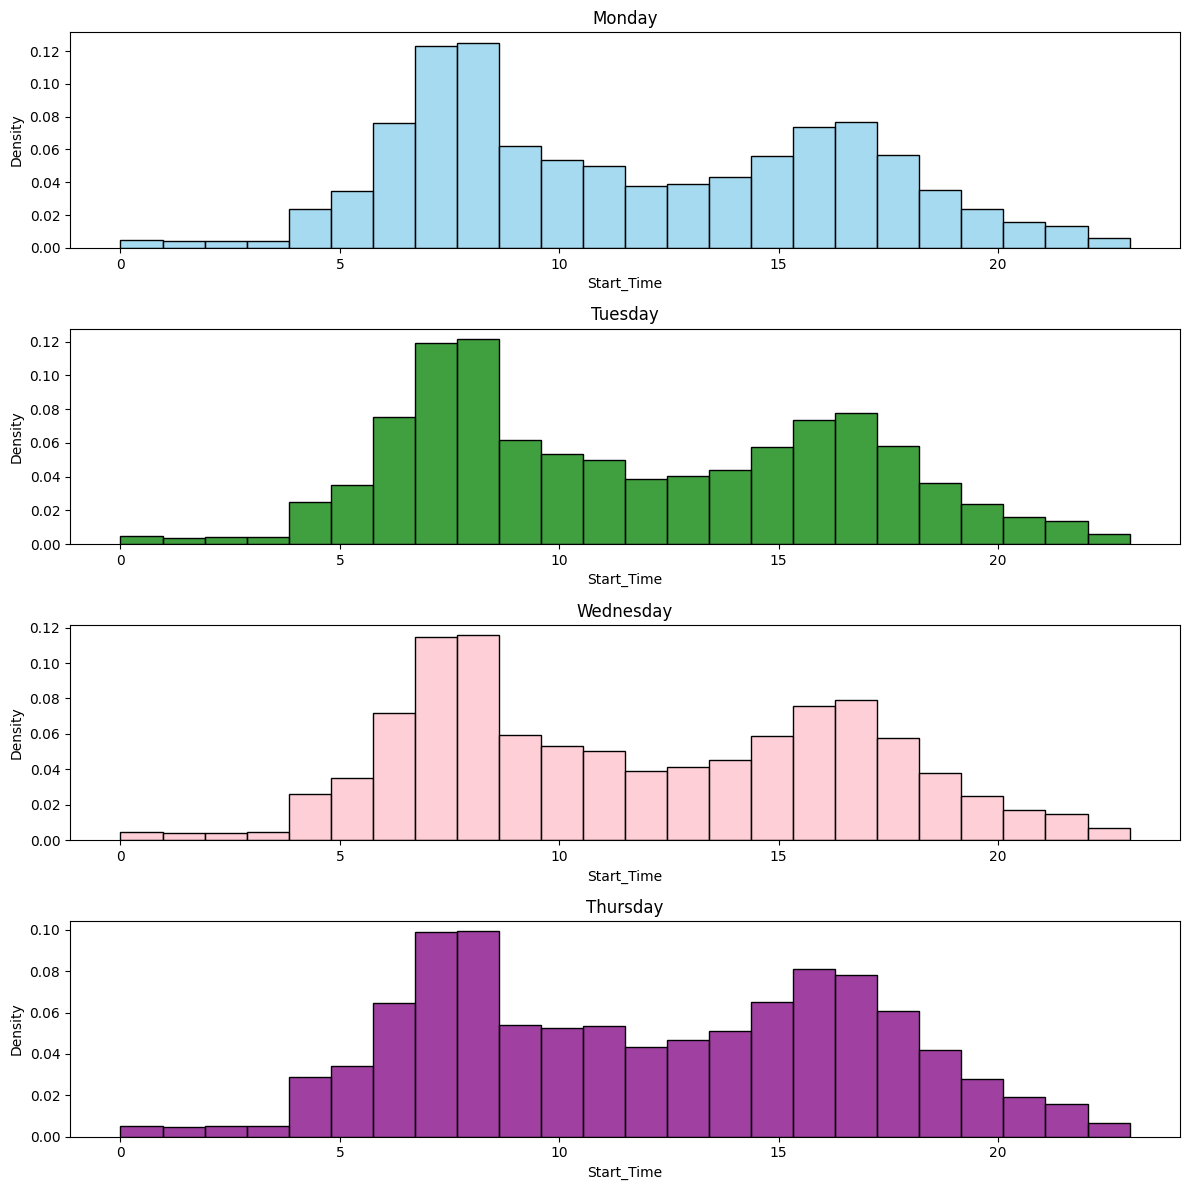

In [27]:
mon_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 1]
tues_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 2]
wednes_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 3]
thurs_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 4]

fig, axis = plt.subplots(4, 1, figsize=(12, 12))

sns.histplot(mon_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[0], color='skyblue').set_title('Monday')
sns.histplot(tues_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[1], color='green').set_title('Tuesday')
sns.histplot(wednes_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[2], color='pink').set_title('Wednesday')
sns.histplot(thurs_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[3], color='purple').set_title('Thursday')

fig.tight_layout()

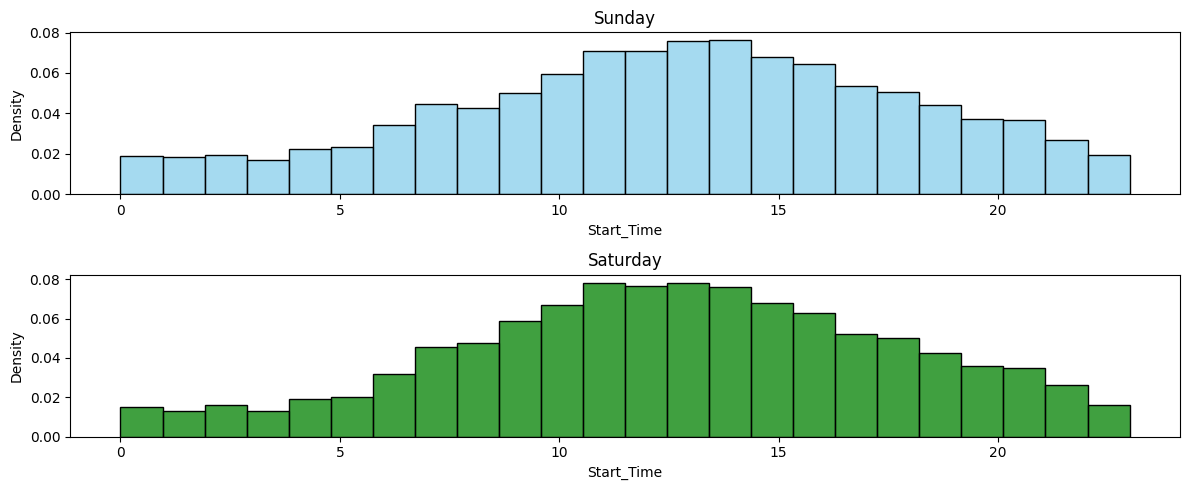

In [28]:
sun_day = US_Accidents[US_Accidents.Start_Time.dt.dayofweek == 6]
sat_day = US_Accidents[US_Accidents.Start_Time.dt.dayofweek == 5]

fig, axis = plt.subplots(2, 1, figsize=(12, 5))

sns.histplot(sun_day.Start_Time.dt.hour, bins=24, kde=False, stat='density', ax=axis[0], color='skyblue')
axis[0].set_title('Sunday')

sns.histplot(sat_day.Start_Time.dt.hour, bins=24, kde=False, stat='density', ax=axis[1], color='green')
axis[1].set_title('Saturday')

fig.tight_layout()

plt.show()


<Axes: ylabel='Weather_Condition'>

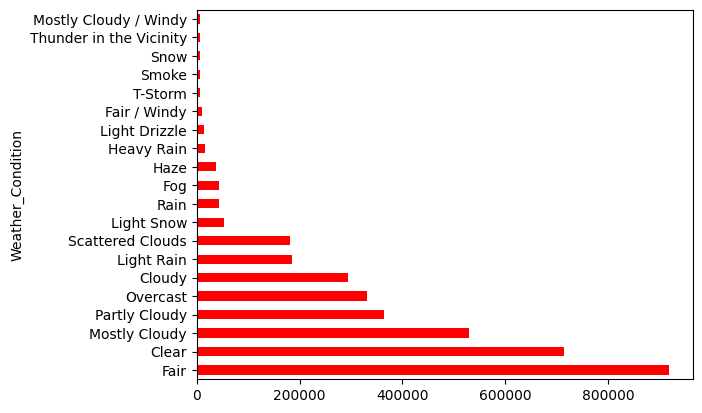

In [29]:
US_Accidents.Weather_Condition.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , color = 'red')

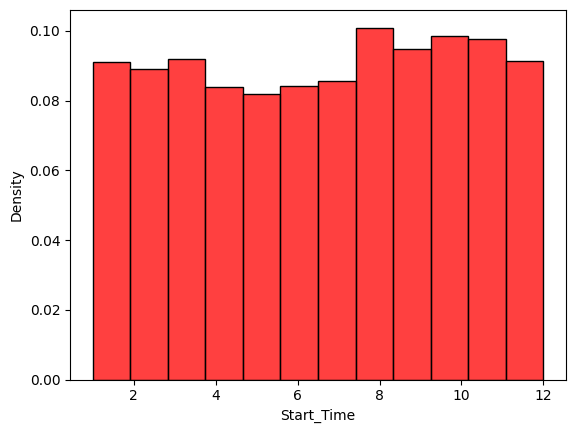

In [30]:
sns.histplot(US_Accidents.Start_Time.dt.month, kde=False, bins=12, stat='density', color='red')
plt.show()

In [31]:
US_Accidents['Start_Time'] = pd.to_datetime(US_Accidents['Start_Time'], errors='coerce', format='mixed')
US_Accidents['End_Time'] = pd.to_datetime(US_Accidents['End_Time'], errors='coerce', format='mixed')

In [32]:
US_Accidents['Start_Year'] = US_Accidents['Start_Time'].dt.year
US_Accidents['Start_Month'] = US_Accidents['Start_Time'].dt.month
US_Accidents['Start_Day'] = US_Accidents['Start_Time'].dt.day
US_Accidents['Start_Hour'] = US_Accidents['Start_Time'].dt.hour
US_Accidents['Start_Weekday'] = US_Accidents['Start_Time'].dt.weekday  # Monday=0, Sunday=6
US_Accidents['Is_Weekend'] = US_Accidents['Start_Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [33]:
US_Accidents = US_Accidents.drop(columns=['Start_Time', 'End_Time'])

In [34]:
US_Accidents = pd.get_dummies(US_Accidents, drop_first=True, columns=['Source', 'Sunrise_Sunset'])

In [35]:
street_mean = US_Accidents.groupby('Street')['Severity'].mean()
US_Accidents['Street'] = US_Accidents['Street'].map(street_mean)

# For 'Weather_Timestamp'
timestamp_mean = US_Accidents.groupby('Weather_Timestamp')['Severity'].mean()
US_Accidents['Weather_Timestamp'] = US_Accidents['Weather_Timestamp'].map(timestamp_mean)

# For 'city'
timestamp_mean = US_Accidents.groupby('City')['Severity'].mean()
US_Accidents['City'] = US_Accidents['City'].map(timestamp_mean)

# For 'weather_condition'
timestamp_mean = US_Accidents.groupby('Weather_Condition')['Severity'].mean()
US_Accidents['Weather_Condition'] = US_Accidents['Weather_Condition'].map(timestamp_mean)

In [36]:
from category_encoders import BinaryEncoder
state_encoder = BinaryEncoder()
state_encoded = state_encoder.fit_transform(US_Accidents['State'])
US_Accidents = pd.concat([US_Accidents, state_encoded], axis=1)

# drop state
US_Accidents = US_Accidents.drop(columns=['State'])

In [37]:
US_Accidents.dtypes

Severity                  int64
Start_Lat               float64
Start_Lng               float64
Distance(mi)            float64
Street                  float64
City                    float64
Country.1                object
Weather_Timestamp       float64
Temperature(F)          float64
Humidity(%)             float64
Pressure(in)            float64
Visibility(mi)          float64
Wind_Speed(mph)         float64
Weather_Condition       float64
Amenity                    bool
Bump                       bool
Crossing                   bool
Give_Way                   bool
Junction                   bool
No_Exit                    bool
Railway                    bool
Roundabout                 bool
Station                    bool
Stop                       bool
Traffic_Calming            bool
Traffic_Signal             bool
Turning_Loop               bool
Start_Year                int32
Start_Month               int32
Start_Day                 int32
Start_Hour                int32
Start_We

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

US_Accidents = pd.read_csv('US_Accidents_March23.csv')  

print(US_Accidents.head())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19896\4257362564.py:5: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  US_Accidents = pd.read_csv('US_Accidents_March23.csv')


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

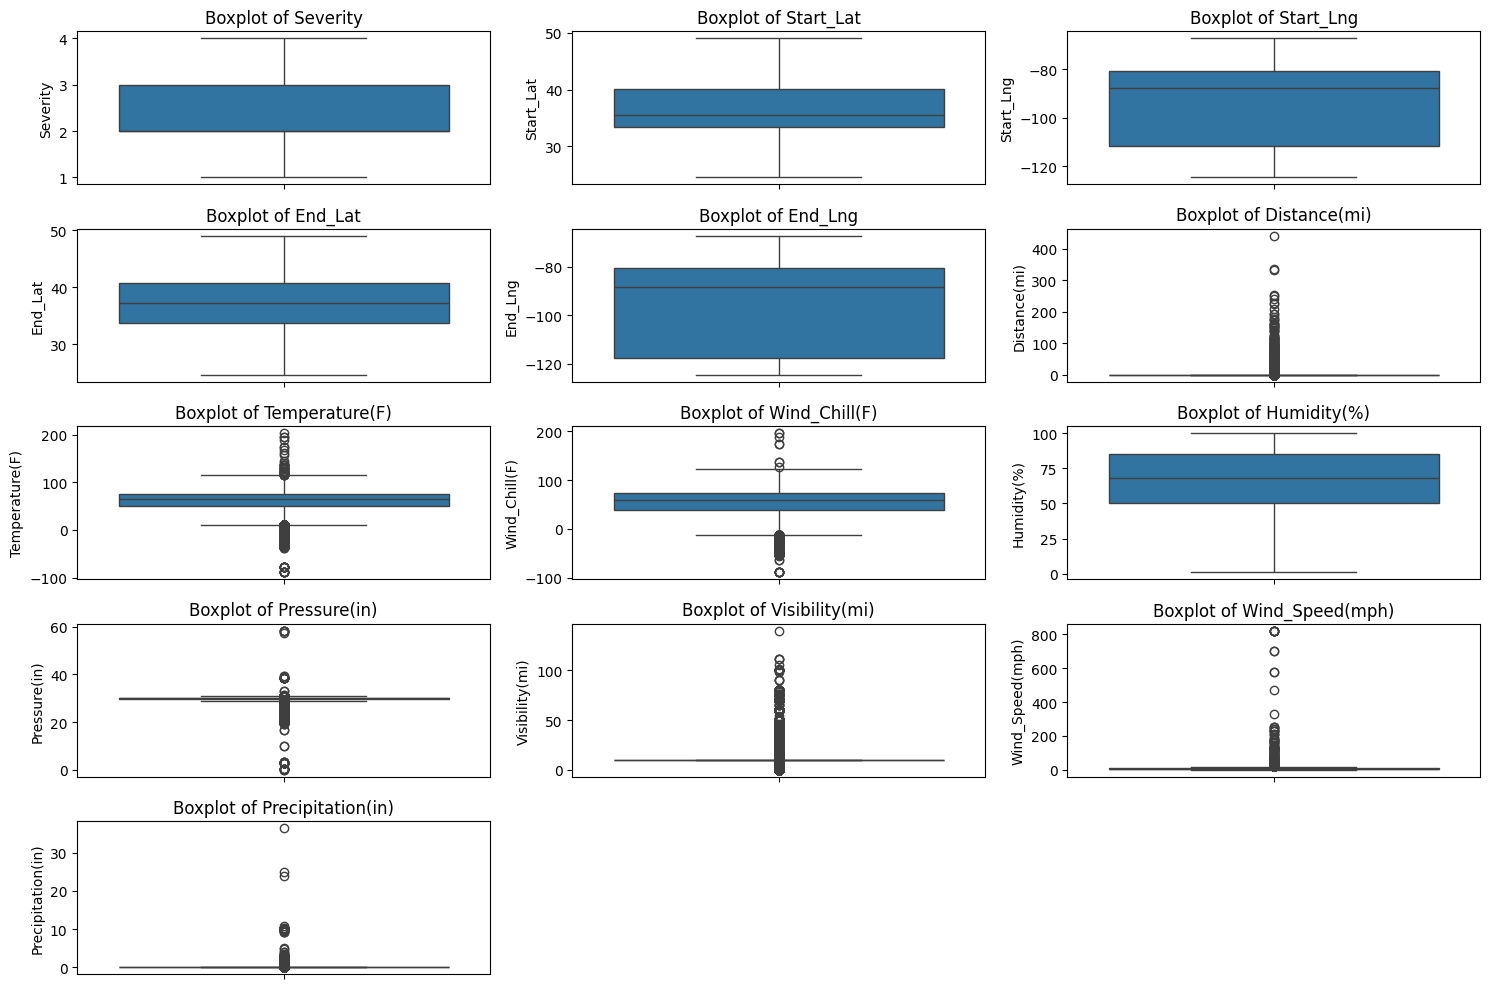

Column: Precipitation(in)
Number of outliers: 267826
--------------------


In [8]:
numerical_cols = US_Accidents.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=US_Accidents[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


outlier_info = {} 

for col in numerical_cols:
    Q1 = US_Accidents[col].quantile(0.25)
    Q3 = US_Accidents[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

outliers = US_Accidents[(US_Accidents[col] < lower_bound) | (US_Accidents[col] > upper_bound)]

outlier_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': len(outliers),
    }

print(f"Column: {col}")
print(f"Number of outliers: {len(outliers)}")
print("-" * 20)

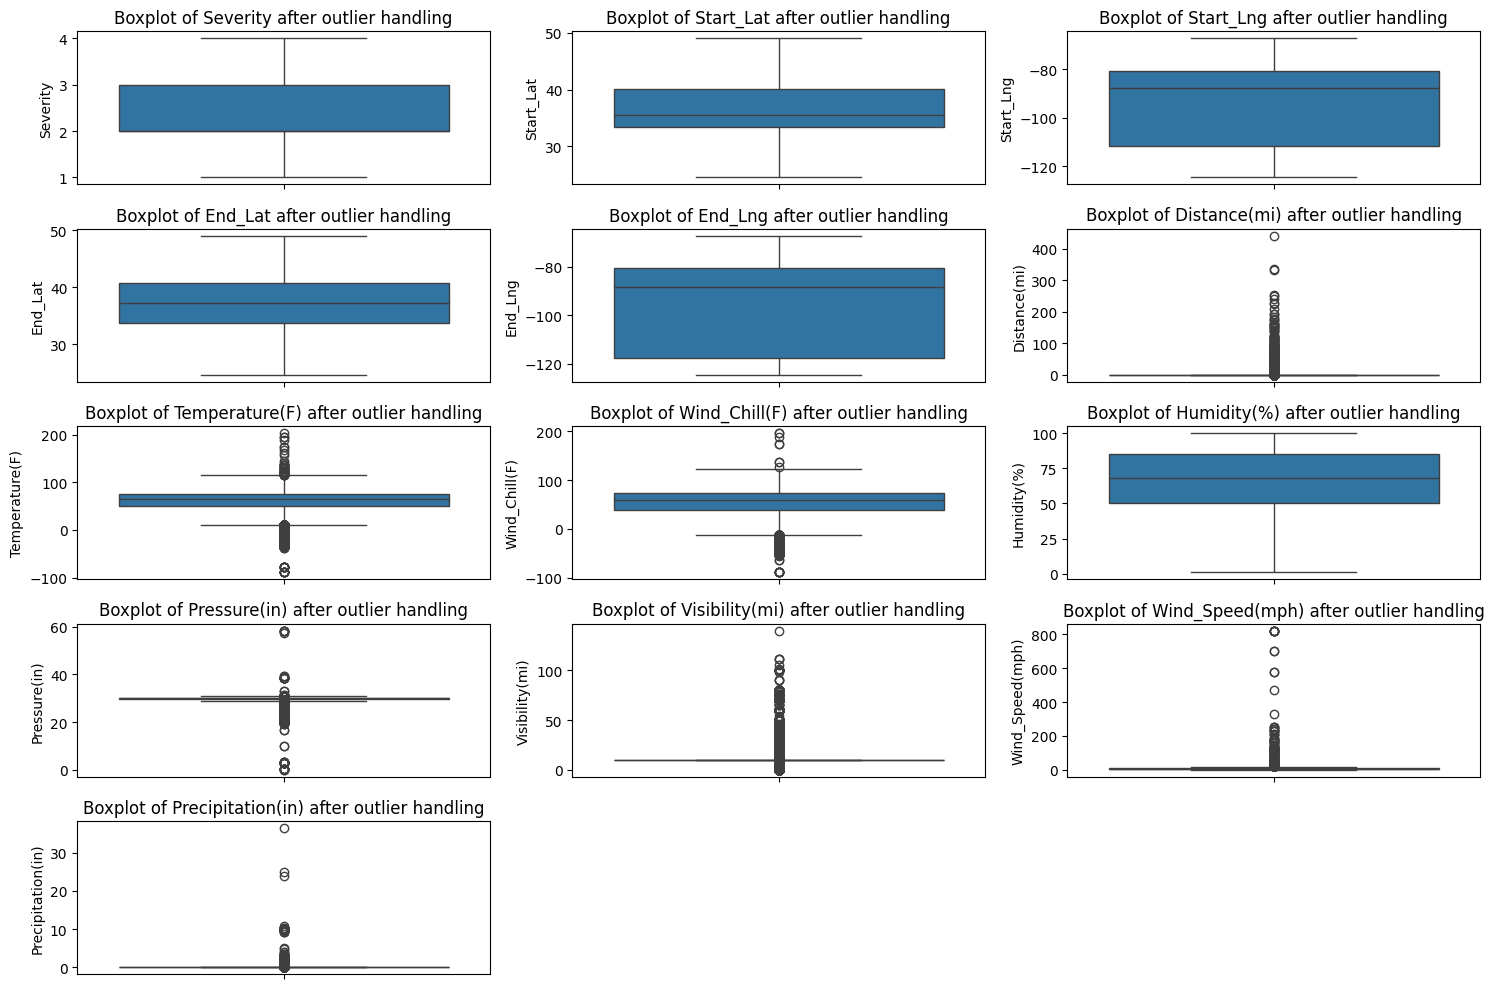

In [11]:
numerical_cols = US_Accidents.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=US_Accidents[col])
    plt.title(f'Boxplot of {col} after outlier handling')

plt.tight_layout()
plt.show()